# Plot the distribution fit using WorkloadFit class
 
### Data from neuroscience applications

 - Plot figures with data and best fits

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

import WorkloadFit

In [24]:
bins=500
save=True

# Log data

- input file is represented by an array of execution times

`cost_model = WorkloadFit.LogDataCost(data)`

- all sampes as training
- using only the distribution interpolation model

In [21]:
dataset = "ON_MR_segmentation_vDEV1"
data = pd.Series(np.loadtxt("ACCRE/"+dataset+".out", delimiter=' '))

cost_model = WorkloadFit.LogDataCost(data)
print("Total entries in the datalog: %d" %(len(data)))

Total entries in the datalog: 1299


In [22]:
wf = WorkloadFit.WorkloadFit(data, cost_model, bins=bins)
cost = wf.compute_discrete_cost()
print("Optimal cost: %5.2f" %(cost))

Optimal cost: 121253.81


In [23]:
wf.set_interpolation_model(WorkloadFit.DistInterpolation())
cost = wf.compute_interpolation_cost()
dist_params = wf.get_best_fit()
print("Distribution fit cost: %5.2f" %(cost))
print("Distribution: %s\nParams %s\nSSE of the fit: %s" %(dist_params[0].name, dist_params[1], dist_params[2]))

Distribution fit cost: 122997.85
Distribution: gamma
Params (22.221695837940015, -59020.85258470768, 5820.848853044208)
SSE of the fit: 8.09017198851603e-10


### Plot data and the best polynomial and distribution fits

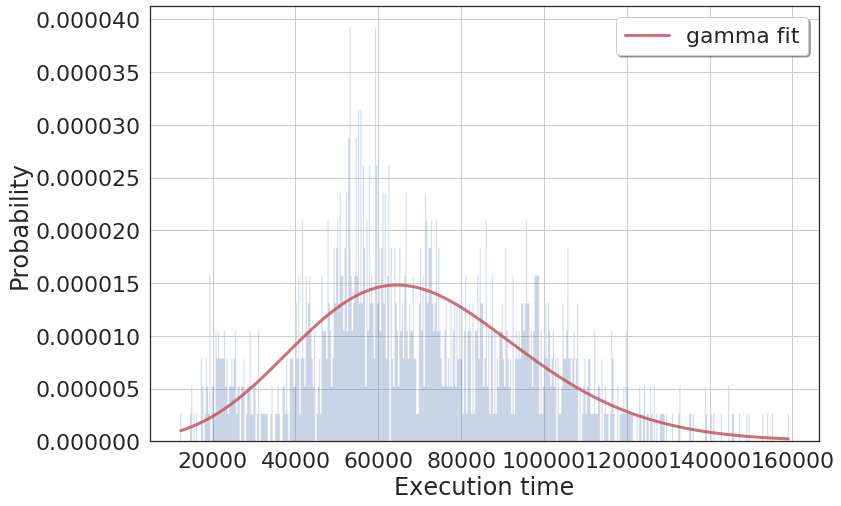

In [26]:
y, x = np.histogram(data, bins=bins, density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0

fig, ax = plt.subplots(figsize=(12,8))
sns.set(font_scale=2)
sns.set_style("white")
ax.plot(x, dist_params[0].pdf(x, loc=dist_params[1][-2], scale=dist_params[1][-1], *dist_params[1][:-2]),
        'r-', lw=3, alpha=0.8, label='%s fit' %(dist_params[0].name))
ax.hist(data, bins=bins, density=True, histtype='stepfilled', alpha=0.3)
ax.legend(shadow=True)

plt.grid(True)
ax.set_xlabel('Execution time')
ax.set_ylabel('Probability')
if save:
    plt.savefig("figures_ACCRE/%s_fit.png" %(dataset))
plt.show()